# **Fetal Risk Prediction**


###Importing Libraries 

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.preprocessing import StandardScaler 

# Processing
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

# ML models
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier as GB
from xgboost import XGBClassifier as XGB
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

### Preparing Data

In [2]:
# Loading data
fetal_df=pd.read_csv('./fetal_health.csv')

In [3]:
# Preprocessing
fetal_df = fetal_df.dropna() #drop the rows where at least one element is missing
fetal_df = fetal_df.drop_duplicates() #remove duplicated rows 
# Turn the problem into a binary classification
fetal_df.loc[fetal_df['fetal_health']==1.000, 'target'] = 0.0 #Normal
fetal_df.loc[fetal_df['fetal_health']==2.000, 'target'] = 1.0 #Distressed
fetal_df.loc[fetal_df['fetal_health']==3.000, 'target'] = 1.0 #Distressed
fetal_df = fetal_df.drop(columns=['fetal_health'], axis=1)
# Input and Output
input_df = fetal_df.drop(['target'],axis=1)
output_df = fetal_df['target'].copy() 

In [4]:
# Split into train/test sets : 70/30
X_train_no, X_test_no, y_train, y_test = train_test_split(input_df, output_df, test_size=0.3, stratify=output_df, random_state=1) #same proportion of classes 0 and 1 in training and testing

In [5]:
# Scaling data because all the independent variables need to be scaled
scalar = StandardScaler() 
scalar.fit(X_train_no)
X_train = scalar.transform(X_train_no)
X_test = scalar.transform(X_test_no)

In [6]:
# Evaluation functions

def evaluation_training(y_train, y_pred):
    
    # Print Precision, Recall, F1 Score, and Accuracy metrics
    print('Evaluation Metrics for training:')
    print('Precision: %.3f' %precision_score(y_train, y_pred))
    print('Recall: %.3f'%recall_score(y_train, y_pred))
    print('F1 Score: %.3f' %f1_score(y_train, y_pred))
    print('Accuracy: %.3f'%accuracy_score(y_train, y_pred))
    print()

def evaluation_testing(y_test, y_pred):
    
    # Print Precision, Recall, F1 Score, and Accuracy metrics
    print('Evaluation Metrics for testing:')
    print('Precision: %.3f' %precision_score(y_test, y_pred))
    print('Recall: %.3f'%recall_score(y_test, y_pred))
    print('F1 Score: %.3f' %f1_score(y_test, y_pred))
    print('Accuracy: %.3f'%accuracy_score(y_test, y_pred))
    
    # Plot Confusion Matrix
    print('\nConfusion Matrix:')
    print(' TN,  FP, FN, TP')
    print(confusion_matrix(y_test, y_pred).ravel())

    plt.subplots(figsize=(10,8))
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='Blues',annot = True, annot_kws = {'size':15})

###Logistic Regression

First of all, we perform the prediction of fetal health by using Logistic Regression without cross validation. At the first case we will run Logistic Regression model using all the features without any polynomial relation.

Evaluation Metrics for training:
Precision: 0.826
Recall: 0.786
F1 Score: 0.806
Accuracy: 0.916

Evaluation Metrics for testing:
Precision: 0.762
Recall: 0.779
F1 Score: 0.770
Accuracy: 0.897

Confusion Matrix:
 TN,  FP, FN, TP
[460  34  31 109]


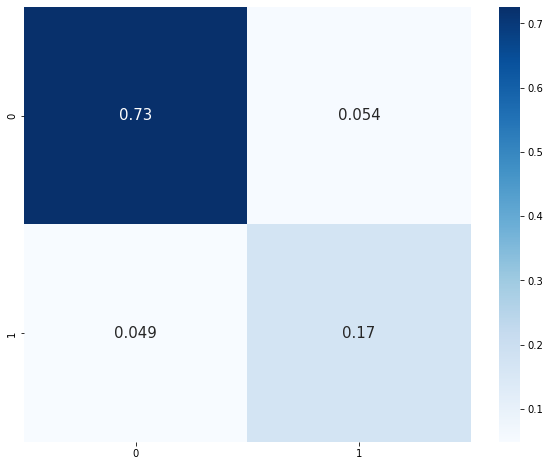

In [7]:
#create Linear Regression model
Lr = LR()
Lr.fit(X_train, y_train)#fit the model with x_train and y_train
predicted_train=Lr.predict(X_train)#predict the target of training samples
predicted_class=Lr.predict(X_test)#predict the target of testing samples
#evaluation of model performance
evaluation_training(y_train,predicted_train)
evaluation_testing(y_test,predicted_class)


As we notice here, we reched an accuracy of 92% for the training set and 90% for the testing set.

Now we will a polynomial relation between the features of order one. 

Evaluation Metrics for training:
Precision: 0.826
Recall: 0.786
F1 Score: 0.806
Accuracy: 0.916

Evaluation Metrics for testing:
Precision: 0.762
Recall: 0.779
F1 Score: 0.770
Accuracy: 0.897

Confusion Matrix:
 TN,  FP, FN, TP
[460  34  31 109]


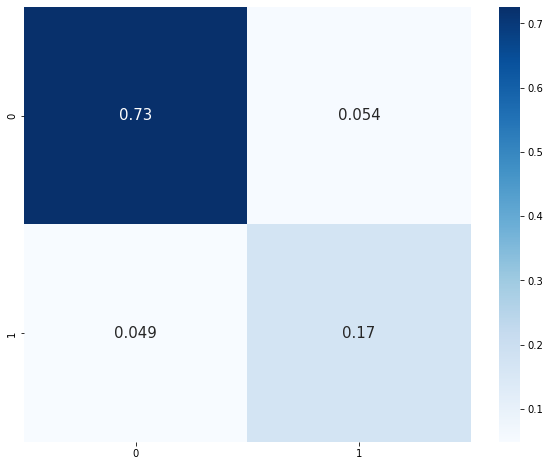

In [8]:
X_train1= pf(degree=1, include_bias=False).fit_transform(X_train)#we fit polynomial features and transform the X_train 
X_test1=pf(degree=1, include_bias=False).fit_transform(X_test)#we fit polynomial features and transform the X_test
LR1=LR()#creating a logistic regression model
LR1.fit(X_train1,y_train)#we train the model with the new X_train and y_train
predicted_train_1=LR1.predict(X_train1)#predict the class for training samples
predicted_class_1=LR1.predict(X_test1)#we use predict method to output labels for testing set'samples
#evaluation of the model performance
evaluation_training(y_train,predicted_train_1)
evaluation_testing(y_test,predicted_class_1)

With polynomial relation between the features of order one, we obtained the same performence. Let's try order 2. 

Evaluation Metrics for training:
Precision: 0.953
Recall: 0.930
F1 Score: 0.941
Accuracy: 0.974

Evaluation Metrics for testing:
Precision: 0.810
Recall: 0.793
F1 Score: 0.801
Accuracy: 0.913

Confusion Matrix:
 TN,  FP, FN, TP
[468  26  29 111]


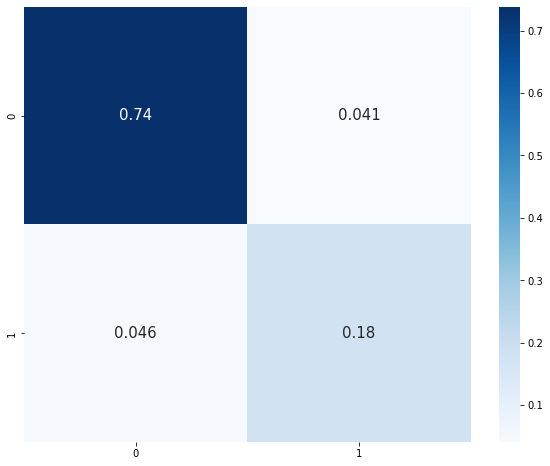

In [9]:
X_train2 = pf(degree=2, include_bias=False).fit_transform(X_train)#we fit polynomial features and transform the x_train
X_test2= pf(degree=2, include_bias=False).fit_transform(X_test)#we fit polynomial features and transform the x_test
#we create the model
LR2=LR(max_iter=1000)
LR2.fit(X_train2,y_train)# we fir the model with new x_train and y_train
predicted_train_2=LR2.predict(X_train2)#predict the class for training samples
predicted_class_2=LR2.predict(X_test2)#predict the target for testing samples
#evaluation of the model
evaluation_training(y_train,predicted_train_2)
evaluation_testing(y_test,predicted_class_2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Evaluation Metrics for training:
Precision: 0.997
Recall: 0.997
F1 Score: 0.997
Accuracy: 0.999

Evaluation Metrics for testing:
Precision: 0.844
Recall: 0.814
F1 Score: 0.829
Accuracy: 0.926

Confusion Matrix:
 TN,  FP, FN, TP
[473  21  26 114]


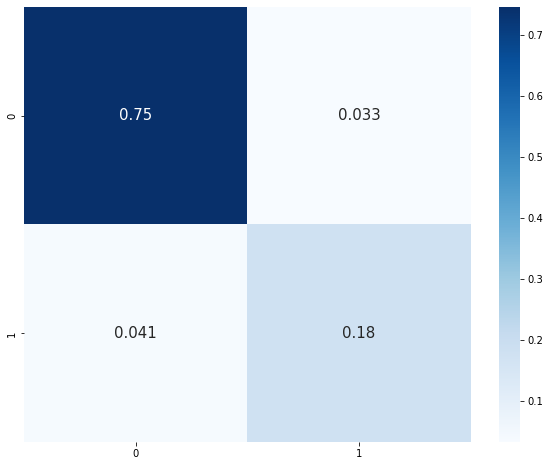

In [10]:
X_train5 = pf(degree=5, include_bias=False).fit_transform(X_train)#we fit polynomial features and transform x_train
X_test5 = pf(degree=5, include_bias=False).fit_transform(X_test)#we fit polynomial features and transform x_test
#we create the model
LR5=LR(max_iter=400)
LR5.fit(X_train5,y_train)#we fit the model with new x_train and y_train
predicted_train_5=LR5.predict(X_train5)#predict the class of new x_train
predicted_class_5=LR5.predict(X_test5)#predict the class of new x_test
#evaluation of the model
evaluation_training(y_train,predicted_train_5)
evaluation_testing(y_test,predicted_class_5)

As we can see, the bigger the order is, the best the performance we obtain. By using the Order 5 we get a high accuracy in both phases training and testing which let us assume that the model is not overfitting neither underfitting.

Now we will explore the performance by using same model but with K-Fold cross validation.

### Logistic regression with Cross-Validation



We will use the K-Fold cross validation with a k=5 to test the performance of our model.

In [11]:
#we apply linear regression with cross validation without any polynomial relation between the featurs and we print the results
print('Results for normal Logistic Regression')
print('accuracy by using 5FOLD Cross-val: ',cross_val_score(Lr,X_train,y_train,cv=5).mean())
print('recall by using FFOLD Cross-val: ',cross_val_score(Lr,X_train,y_train,cv=5, scoring='recall').mean())
#we apply linear regression with cross validation witha polynomial relation of order 1 between the featurs and we print the results
print("Results for order 1")
print('accuracy by using 5FOLD Cross-val: ',cross_val_score(LR1,X_train1,y_train,cv=5).max())
print('recall by using 5FOLD Cross-val: ',cross_val_score(LR1,X_train1,y_train,cv=5, scoring='recall').mean())
#we apply linear regression with cross validation with a polynomial relation of order 2 between the featurs and we print the results
print('Results for order 2')
print('accuracy by using 5FOLD Cross-val: ',cross_val_score(LR2,X_train2,y_train,cv=5).mean())
print('recall by using FFOLD Cross-val: ',cross_val_score(LR2,X_train2,y_train,cv=5, scoring='recall').mean())


Results for normal Logistic Regression
accuracy by using 5FOLD Cross-val:  0.9080348144754925
recall by using FFOLD Cross-val:  0.7642890442890444
Results for order 1
accuracy by using 5FOLD Cross-val:  0.9290540540540541
recall by using 5FOLD Cross-val:  0.7642890442890444
Results for order 2
accuracy by using 5FOLD Cross-val:  0.932388914338067
recall by using FFOLD Cross-val:  0.8222843822843823


With cross validation the best model to choose is Logistic Regression with a polynomial relation of order 2 between the features. This model has the highest accuracy (93.2%) and recall (82.2%) compared to the others.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

Evaluation Metrics for training:
Precision: 0.994
Recall: 0.991
F1 Score: 0.992
Accuracy: 0.997

Evaluation Metrics for testing:
Precision: 0.797
Recall: 0.786
F1 Score: 0.791
Accuracy: 0.909

Confusion Matrix:
 TN,  FP, FN, TP
[466  28  30 110]
tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
recall : 0.8378088578088578


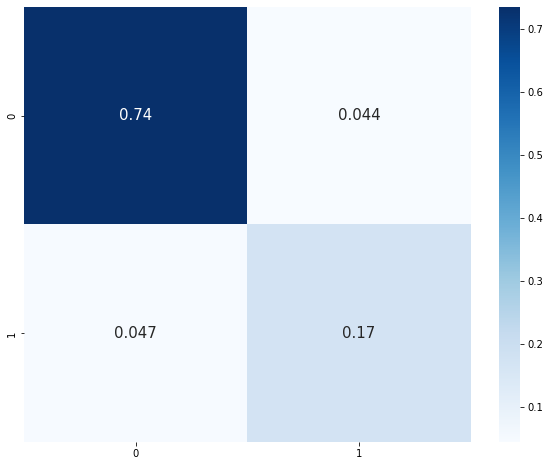

In [12]:
#we use a grid search to tune the hyperparameters and select the ones giving high performance
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lr_cv=GridSearchCV(LR(max_iter=3000),grid,cv=5,scoring='recall')
lr_cv.fit(X_train2,y_train)#we fit the gridsearch model for logistic regression with x_train obtained with a polynomial relation of order 2 between the features
#prediction of the targets of new x_train and new x_test
lr_2_training = lr_cv.predict(X_train2) 
lr_2_testing = lr_cv.predict(X_test2)
#evaluation of the model
evaluation_training(y_train, lr_2_training)
evaluation_testing(y_test, lr_2_testing)
#The best hyperparameters to get high performance
print("tuned hpyerparameters :(best parameters) ",lr_cv.best_params_)
print("recall :",lr_cv.best_score_)

The polynomial relation between all the features (21) with an order greater than 2 generate new features, which increase the complexity of the computations. While trying to run K-Fold cross validation algorithm for the order 5 we found a problem. We were unable to perform these computation as the number of iterations is limited. 

The K-fold cross validation performed well in the other cases (without polynomial relation and with a polynomial relation of order 1 and 2). 

As the K-fold cross validation give us better results, we will use it for the next sections. 


### KNN

At first, we will test our data using the KNN model without the cross validation. We will pick two random k and try to compare the results.

Results for K=5
Evaluation Metrics for testing:
Precision: 0.837
Recall: 0.736
F1 Score: 0.783
Accuracy: 0.910

Confusion Matrix:
 TN,  FP, FN, TP
[474  20  37 103]
None
Results for K=11
Evaluation Metrics for testing:
Precision: 0.855
Recall: 0.714
F1 Score: 0.778
Accuracy: 0.910

Confusion Matrix:
 TN,  FP, FN, TP
[477  17  40 100]
None


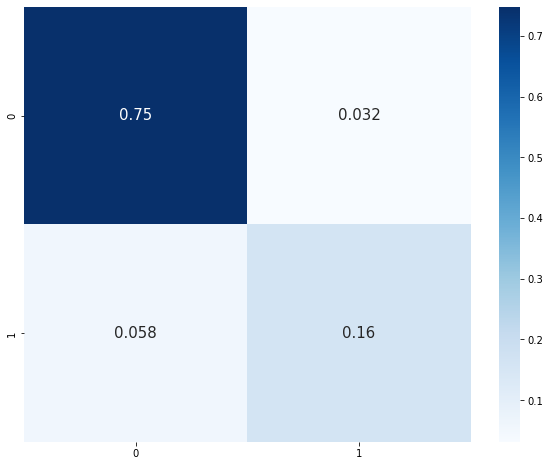

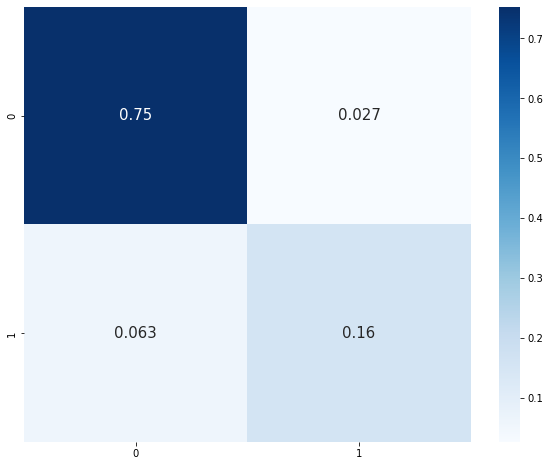

In [13]:
classifier_5 = KNeighborsClassifier(n_neighbors=5)
classifier_5.fit(X_train, y_train)
classifier_11 = KNeighborsClassifier(n_neighbors=11)
classifier_11.fit(X_train, y_train)

y_pred_5 = classifier_5.predict(X_test)
y_pred_11 = classifier_11.predict(X_test)
print("Results for K=5")
print(evaluation_testing(y_test, y_pred_5))
print("Results for K=11")
print(evaluation_testing(y_test, y_pred_11))

Text(0, 0.5, 'Testing Accuracy')

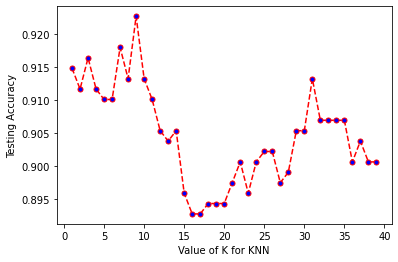

In [14]:
k_range = range(1,40)
scores = []

# We use a loop through the range 1 to 40
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# plot the relationship between K and testing accuracy
plt.plot(range(1, 40), scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

We will try now to plot the realtionship between K and the testing accurancy and then we will try to plot the relationship between k and the recall score. 

- accuracy score

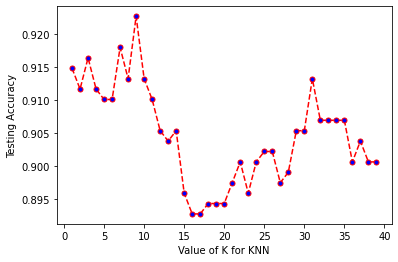

In [15]:
k_range = range(1,40)
scores = []

# We use a loop through the range 1 to 40
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 40), scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

- Recall score

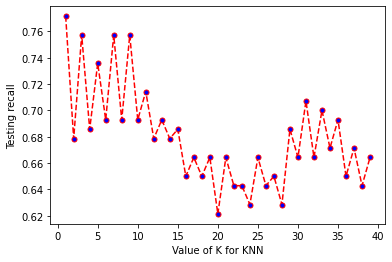

In [16]:
k_range = range(1,40)
scores = []

# We use a loop through the range 1 to 40
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(recall_score(y_test, y_pred))

plt.plot(range(1, 40), scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing recall')
plt.show()

We will now try to choose the most suitable k for the KNN model that has at the same time a good accuracy score and recall score. while for k=8, the model has the best accuracy, it lacks a lot in term of recall. The same goes with k=1 that verifies the highest recall score but a low accuracy score. The best solution for this problem is to choose k=7 that has the second best accuracy score and recall score.

Results for K=7
Evaluation Metrics for testing:
Precision: 0.855
Recall: 0.757
F1 Score: 0.803
Accuracy: 0.918

Confusion Matrix:
 TN,  FP, FN, TP
[476  18  34 106]
None


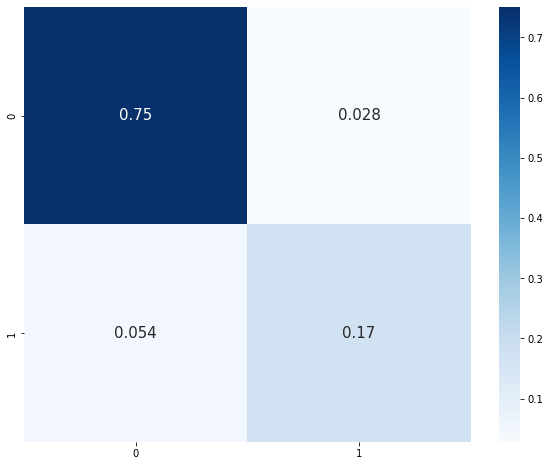

In [17]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Results for K=7")
print(evaluation_testing(y_test, y_pred))

### KNN with cross validation


We try now to test the KNN model with our best k=7 but with cross validation

In [18]:
knn_cv = KNeighborsClassifier(n_neighbors=7)
cv_scores_acc= cross_val_score(knn_cv, X_train, y_train, cv=5)
cv_scores_reca= cross_val_score(knn_cv, X_train, y_train, cv=5, scoring='recall')


print("cv_scores accuracy mean:{}".format(np.mean(cv_scores_acc)))
print("cv_scores recall mean:{}".format(np.mean(cv_scores_reca)))

cv_scores accuracy mean:0.9134448007329363
cv_scores recall mean:0.7185081585081584


We observe tha while the accuracy score is pretty high, the recall score got lower than how it was before. To fix this problem, we will try to plot the accuracy score and recall score for different K in a range from 1 to 40 and then we can pick a k that's suitable for this problem.

- relationship between k and accuracy score

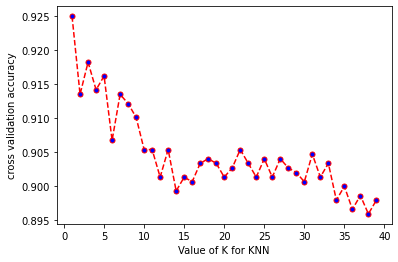

In [19]:
k_range = range(1,40)
scores = []

for k in k_range:
    knn_cvk = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_cvk, X_train, y_train, cv=5)
    scores.append(np.mean(cv_scores))

plt.plot(range(1, 40), scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('Value of K for KNN')
plt.ylabel('cross validation accuracy')
plt.show()

- relationship between k and recall score

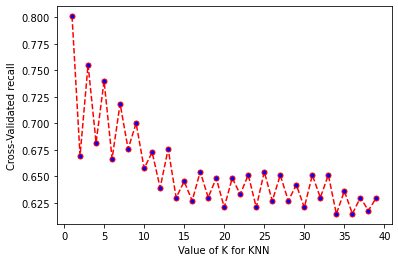

In [20]:
k_range = range(1, 40)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    recall = abs(cross_val_score(knn, X_train, y_train, cv=5, scoring='recall'))
    k_scores.append(recall.mean())
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated recall')
plt.show()

- Relationship between k and mean square loss

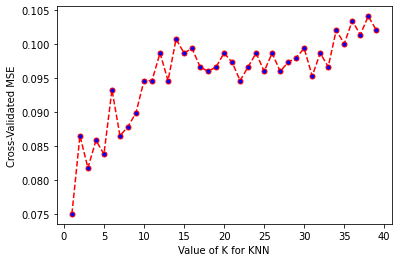

In [21]:
k_range = range(1, 40)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = abs(cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

We observe that with these results the most suitable k for the KNN model with cross validation is k=5, thus it will give us the following results : 

In [22]:
knn_cv = KNeighborsClassifier(n_neighbors=5)
cv_scores_acc= cross_val_score(knn_cv, X_train, y_train, cv=5)
cv_scores_reca= cross_val_score(knn_cv, X_train, y_train, cv=5, scoring='recall')


print("cv_scores accuracy mean:{}".format(np.mean(cv_scores_acc)))
print("cv_scores recall mean:{}".format(np.mean(cv_scores_reca)))

cv_scores accuracy mean:0.9161452130096197
cv_scores recall mean:0.7398601398601399


###SVM

We performs prediction using SVM with two different kernels: linear and RBF. For each model, we do cross validation to find the best hyperparamater

### SVM kernel linear

Evaluation Metrics for training:
Precision: 0.828
Recall: 0.783
F1 Score: 0.805
Accuracy: 0.916

Evaluation Metrics for testing:
Precision: 0.763
Recall: 0.757
F1 Score: 0.760
Accuracy: 0.894

Confusion Matrix:
 TN,  FP, FN, TP
[461  33  34 106]


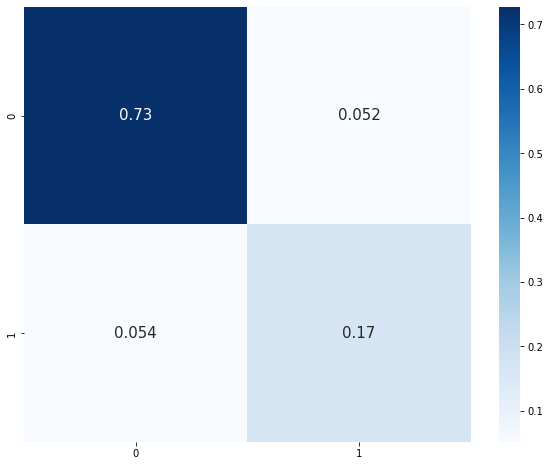

In [23]:
svc_linear = SVC(kernel='linear',probability=True, gamma='scale')

# GridSearch with CV to find the best hyperparameters (gamma and C)
# scoring considered is recall as it is the most important evaluation metric in our case
tuned_parameters = {'gamma': [0.01,0.05, 0.1,1],'C':[0.1,1,5,10,15]}
svc_linear_model = GridSearchCV(svc_linear, tuned_parameters, cv=5, scoring='recall') 
svc_linear_model.fit(X_train,y_train)

# Prediction
svc_linear_training = svc_linear_model.predict(X_train) 
svc_linear_testing = svc_linear_model.predict(X_test)

# Evaluation
evaluation_training(y_train, svc_linear_training)
evaluation_testing(y_test, svc_linear_testing)

With the SVM with linear kernel, the model performs quite well. It reaches an accuracy of 92% during training and 89% during testing. The recall(sensitivity) is still good in the testing with a value of 76%.

In [24]:
print(svc_linear_model.best_estimator_)
print(svc_linear_model.best_score_)

SVC(C=10, gamma=0.01, kernel='linear', probability=True)
0.7765034965034966


###SVM kernel RBF

Evaluation Metrics for training:
Precision: 0.962
Recall: 0.933
F1 Score: 0.947
Accuracy: 0.977

Evaluation Metrics for testing:
Precision: 0.846
Recall: 0.821
F1 Score: 0.833
Accuracy: 0.927

Confusion Matrix:
 TN,  FP, FN, TP
[473  21  25 115]


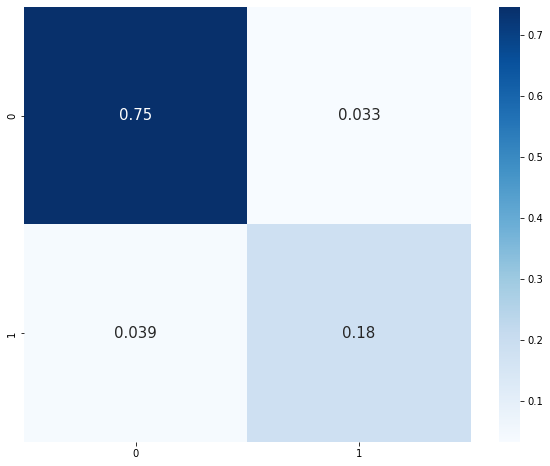

In [25]:
svc_rbf = SVC(kernel='rbf', probability=True, gamma='scale')

# GridSearch with CV to find the best hyperparameters (gamma and C)
# scoring considered is recall as it is the most important evaluation metric in our case
tuned_parameters = {'gamma': [0.01,0.05, 0.1,1],'C':[0.1,1,5,10,15]}
svc_rbf_model = GridSearchCV(svc_rbf, tuned_parameters, cv=5, scoring='recall')
svc_rbf_model.fit(X_train,y_train)

# Prediction
svc_rbf_training = svc_rbf_model.predict(X_train)
svc_rbf_testing = svc_rbf_model.predict(X_test)

# Evaluation
evaluation_training(y_train, svc_rbf_training)
evaluation_testing(y_test, svc_rbf_testing)

With the SVM with RBF kernel, the model performs even better. It reaches an accuracy of 98% during training and 93% during testing. The recall(sensitivity) also improves: it has a value of 82% during testing.

In [26]:
print(svc_rbf_model.best_estimator_)
print(svc_rbf_model.best_score_)

SVC(C=10, gamma=0.05, probability=True)
0.8345920745920747


###Decision tree

Evaluation Metrics for training:
Precision: 0.982
Recall: 0.976
F1 Score: 0.979
Accuracy: 0.991

Evaluation Metrics for testing:
Precision: 0.806
Recall: 0.829
F1 Score: 0.817
Accuracy: 0.918

Confusion Matrix:
 TN,  FP, FN, TP
[466  28  24 116]


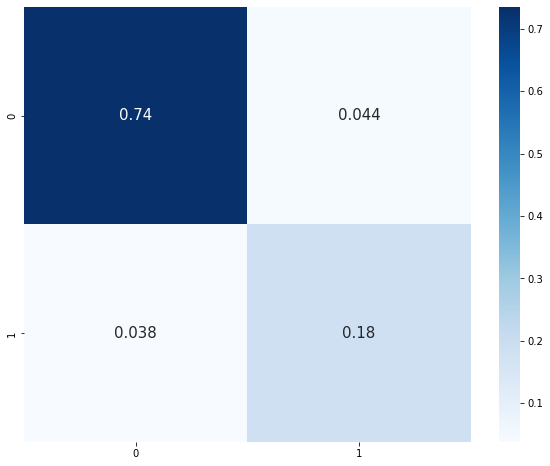

In [27]:
tree = DecisionTreeClassifier(random_state=1)

# GridSearch with CV to find the best hyperparameters (tree depth)
# scoring considered is recall as it is the most important evaluation metric in our case
tuned_parameters = {'max_depth':range(3,20)}
tree_clf = GridSearchCV(tree, tuned_parameters, n_jobs=4, cv=5, scoring='recall')
tree_clf.fit(X_train, y_train)

# Prediction
tree_training = tree_clf.predict(X_train)
tree_testing = tree_clf.predict(X_test)

# Evaluation
evaluation_training(y_train, tree_training)
evaluation_testing(y_test, tree_testing)

With decision tree, the model performs well. It reaches an accuracy of 99% during training and 92% during testing. The recall(sensitivity) is also good: it has a value of 83% during testing.

In [28]:
print(tree_clf.best_estimator_)
print(tree_clf.best_score_)

DecisionTreeClassifier(max_depth=12, random_state=1)
0.8468065268065269


###Random forest

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Evaluation Metrics for training:
Precision: 0.997
Recall: 0.997
F1 Score: 0.997
Accuracy: 0.999

Evaluation Metrics for testing:
Precision: 0.890
Recall: 0.864
F1 Score: 0.877
Accuracy: 0.946

Confusion Matrix:
 TN,  FP, FN, TP
[479  15  19 121]


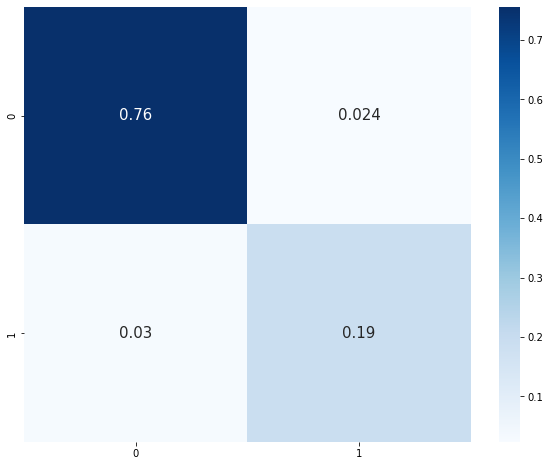

In [29]:
rf = RandomForestClassifier(random_state =1, criterion='entropy')

# GridSearch with CV to find the best hyperparameters (n_estimators and max_depth)
# scoring considered is recall as it is the most important evaluation metric in our case
tuned_parameters = {
    'n_estimators': [50,100,200, 300, 400, 500],
    'max_depth' : [11,12,13]
}
rfc = GridSearchCV(rf, tuned_parameters, cv=5, scoring='recall', verbose=1, n_jobs=-1)
rfc.fit(X_train,y_train)

# Prediction
rfc_training = rfc.predict(X_train)
rfc_testing = rfc.predict(X_test)

# Evaluation
evaluation_training(y_train, rfc_training)
evaluation_testing(y_test, rfc_testing)

With random forest, the model performs really well during training and well during testing. It reaches an accuracy of 99.9% during training and 95% during testing. The recall(sensitivity) is also high: it has a value of 99.7% during training and 86% during testing.

In [30]:
print(rfc.best_estimator_)
print(rfc.best_params_)
print(rfc.best_score_)

RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=200,
                       random_state=1)
{'max_depth': 12, 'n_estimators': 200}
0.8560372960372961


### MLP Classifier


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Evaluation Metrics for training:
Precision: 0.959
Recall: 0.939
F1 Score: 0.949
Accuracy: 0.978

Evaluation Metrics for testing:
Precision: 0.833
Recall: 0.821
F1 Score: 0.827
Accuracy: 0.924

Confusion Matrix:
 TN,  FP, FN, TP
[471  23  25 115]


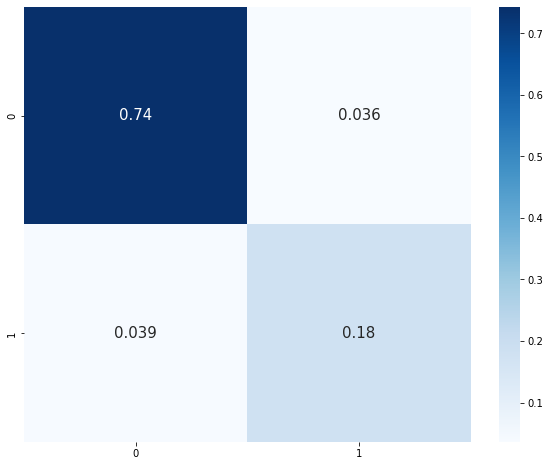

In [31]:
mlp=MLP()#create an MLPClassifier
mlp.fit(X_train,y_train)#fit the model with x_train and y_train
predicted_train=mlp.predict(X_train)#predict the labels of X_train samples
predicted_y=mlp.predict(X_test)#predict the labels of X_test samples
#evaluate model's performance
evaluation_training(y_train, predicted_train)
evaluation_testing(y_test, predicted_y)


We will use now a gridSearch to define the best combination of hyperparameters to tune the model and have better metrics.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Evaluation Metrics for training:
Precision: 0.945
Recall: 0.942
F1 Score: 0.943
Accuracy: 0.975

Evaluation Metrics for testing:
Precision: 0.806
Recall: 0.771
F1 Score: 0.788
Accuracy: 0.909

Confusion Matrix:
 TN,  FP, FN, TP
[468  26  32 108]
tuned hpyerparameters :(best parameters)  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
recall : 0.9337242327072837


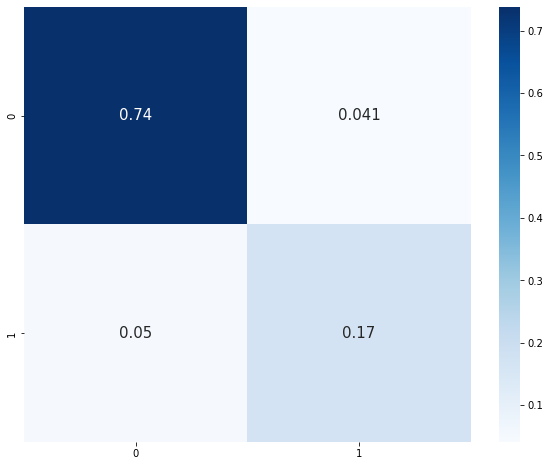

In [32]:
#tuning parameters
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp_cv = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
mlp_cv.fit(X_train, y_train)#we fit the model with x_train and y_train
#predict labels of x_train and x_test samples
mlp_training = mlp_cv.predict(X_train) 
mlp_testing = mlp_cv.predict(X_test)
#evaluation of model's performance
evaluation_training(y_train, mlp_training)
evaluation_testing(y_test, mlp_testing)
#The best parameters to choose to get high performance
print("tuned hpyerparameters :(best parameters) ",mlp_cv.best_params_)
print("recall :",mlp_cv.best_score_)

### Gradient Boosting Classifier

Evaluation Metrics for training:
Precision: 0.994
Recall: 0.969
F1 Score: 0.981
Accuracy: 0.992

Evaluation Metrics for testing:
Precision: 0.908
Recall: 0.843
F1 Score: 0.874
Accuracy: 0.946

Confusion Matrix:
 TN,  FP, FN, TP
[482  12  22 118]


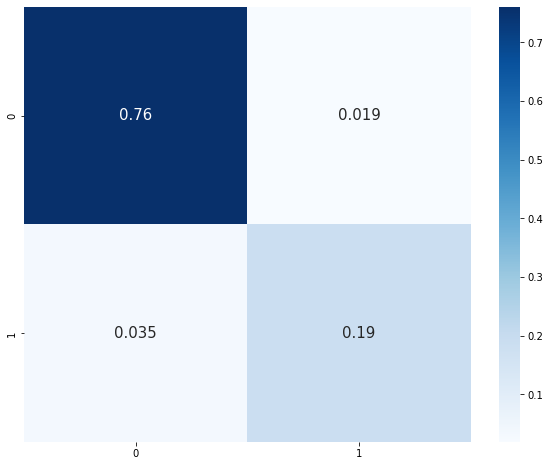

In [33]:
gb=GB()#create a gradient boosting classifier
gb.fit(X_train, y_train)#fit the model with X_train and y_train
#predict labels of both training and testing samples
predicted_train=gb.predict(X_train)
predicted_y=gb.predict(X_test)
#evaluate the model's performance
evaluation_training(y_train, predicted_train)
evaluation_testing(y_test, predicted_y)

Evaluation Metrics for training:
Precision: 0.997
Recall: 0.982
F1 Score: 0.989
Accuracy: 0.995

Evaluation Metrics for testing:
Precision: 0.891
Recall: 0.821
F1 Score: 0.855
Accuracy: 0.938

Confusion Matrix:
 TN,  FP, FN, TP
[480  14  25 115]
tuned hpyerparameters :(best parameters)  {'learning_rate': 0.2, 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 10, 'random_state': 3, 'subsample': 0.8}
recall : 0.9492853870819973


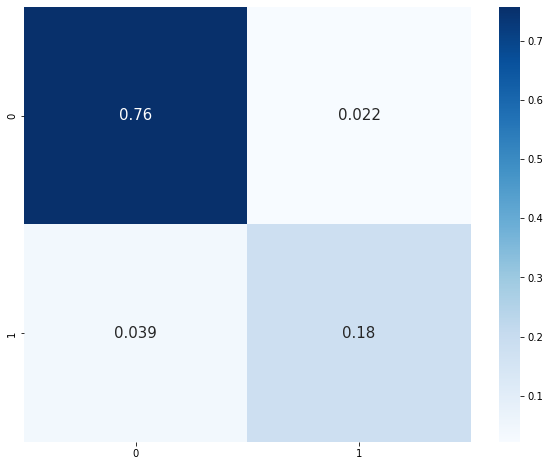

In [34]:
#tuning parameters
parameters = {
    
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "subsample":[ 0.8,  0.9, 1.0],
    "n_estimators":[10],
    "random_state": [3,5,10]
    }
#create gridSearch with the created gradiant boosting classifier
gb_cv = GridSearchCV(gb, parameters, cv=5, n_jobs=-1)
gb_cv.fit(X_train, y_train)#we fit the model with x_train and y_train
#predict labels of x_train and x_test samples
gb_training = gb_cv.predict(X_train) 
gb_testing = gb_cv.predict(X_test)
#evaluate the model's performance
evaluation_training(y_train, gb_training)
evaluation_testing(y_test, gb_testing)
#The best hyperparameters to choose to get high performance
print("tuned hpyerparameters :(best parameters) ",gb_cv.best_params_)
print("recall :",gb_cv.best_score_)

### Extreme gradient boosting

Evaluation Metrics for training:
Precision: 0.994
Recall: 0.969
F1 Score: 0.981
Accuracy: 0.992

Evaluation Metrics for testing:
Precision: 0.908
Recall: 0.843
F1 Score: 0.874
Accuracy: 0.946

Confusion Matrix:
 TN,  FP, FN, TP
[482  12  22 118]


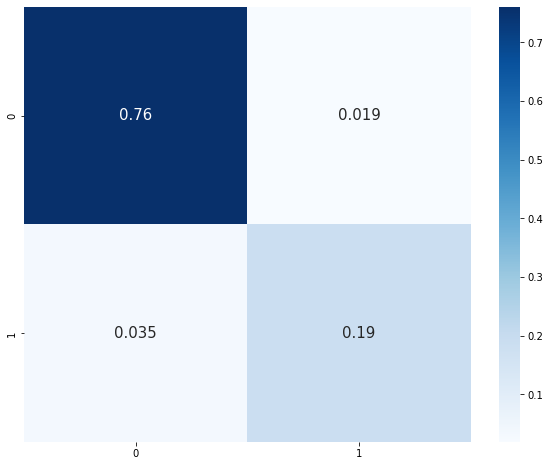

In [35]:
xb=XGB()#create an extreme gradient boosting classifier
xb.fit(X_train, y_train)#fit the model with x_train and y_train
#predict the targets of both training and testing samples
predicted_train=gb.predict(X_train)
predicted_y=gb.predict(X_test)
#evaluate the model's performance
evaluation_training(y_train, predicted_train)
evaluation_testing(y_test, predicted_y)

Evaluation Metrics for training:
Precision: 0.988
Recall: 0.979
F1 Score: 0.983
Accuracy: 0.993

Evaluation Metrics for testing:
Precision: 0.884
Recall: 0.871
F1 Score: 0.878
Accuracy: 0.946

Confusion Matrix:
 TN,  FP, FN, TP
[478  16  18 122]
tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.6}
recall : 0.9573934951901053


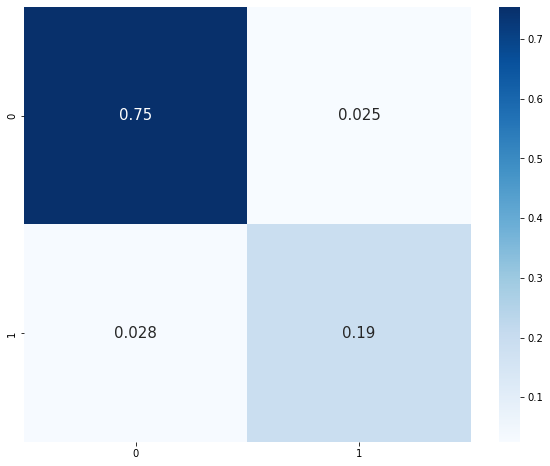

In [36]:
#tuning parameters
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
#create gridSearch with the created extreme gradiant boosting classifier
xb_cv = GridSearchCV(xb, parameters, cv=5, n_jobs=-1)
xb_cv.fit(X_train, y_train)#we fit the model with x_train and y_train
#predict labels of x_train and x_test samples
xb_training = xb_cv.predict(X_train) 
xb_testing = xb_cv.predict(X_test)
#evaluate the model's performance
evaluation_training(y_train, xb_training)
evaluation_testing(y_test, xb_testing)
#The best hyperparameters to choose to get high performance
print("tuned hpyerparameters :(best parameters) ",xb_cv.best_params_)
print("recall :",xb_cv.best_score_)

# Comparison 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


([<matplotlib.axis.XTick at 0x7fd1c67b7f90>,
 [Text(0, 0, 'KNN'),
  Text(0, 0, 'LR'),
  Text(0, 0, 'LSVM'),
  Text(0, 0, 'RBF SVM'),
  Text(0, 0, 'DT'),
  Text(0, 0, 'RF'),
  Text(0, 0, 'MLP'),
  Text(0, 0, 'GB'),
  Text(0, 0, 'XGB')])

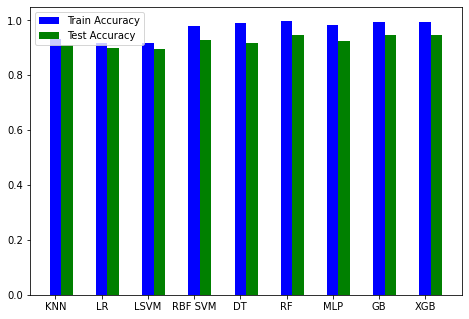

In [37]:
train_accuracies=[]
test_accuracies=[]

names = ["KNN", "LR", "LSVM", "RBF SVM", 
         "DT", "RF", "MLP","GB", "XGB"]
classifiers = [
    KNeighborsClassifier(6),
    LR(),
    SVC(kernel="linear", C=10, gamma=0.01),
    SVC(kernel="rbf", C=10, gamma=0.05),
    DecisionTreeClassifier(max_depth=12, random_state=1),
    RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=200, random_state=1),
    MLP(),
    GB(),
    XGB(colsample_bytree= 0.6, gamma= 0.5, max_depth= 4, min_child_weight= 1, subsample= 0.6)] 

for  clf in  classifiers:
    clf.fit(X_train, y_train)
    train_pred=clf.predict(X_train)
    y_pred = clf.predict(X_test)

    test_accuracies.append(accuracy_score(y_test,y_pred))
    train_accuracies.append(accuracy_score(y_train,train_pred))

fig=plt.figure()
ax = fig.add_axes([0,0,1,1])

X=np.arange(9)
ax.bar(X+0.25 , train_accuracies, color = 'b', width = 0.25)
ax.bar(X+0.5 , test_accuracies, color = 'g', width = 0.25)
ax.legend(labels=['Train Accuracy', 'Test Accuracy'])
plt.xticks(X+0.25,names)
